<a href="https://colab.research.google.com/github/TranDangKhoi-20146356/AI/blob/main/w4(fuzzy_logic)_24_2_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

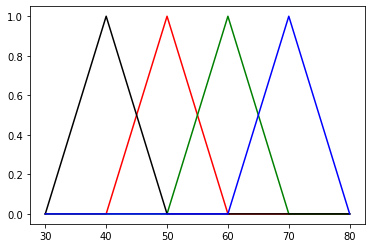

In [ ]:
x=np.arange(30,81,1)
slow=fuzz.trimf(x,[40,50,60])
medium_fast =fuzz.trimf(x,[50,60,70])
medium_speed =fuzz.trimf(x,[30,40,50])
full_fast= fuzz.trimf(x,[60,70,80])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x,medium_fast,'green',linewidth=1.5,label='medium_fast')
plt.plot(x,medium_speed,'black',linewidth=1.5,label='medium_speed')
plt.plot(x,full_fast,'blue',linewidth=1.5,label='full_fast')




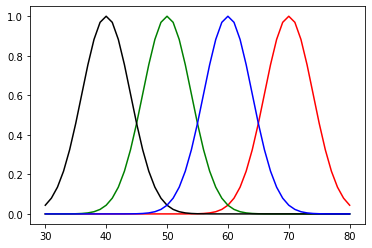

In [ ]:
z=np.arange(30,81,1)
slow=fuzz.gaussmf(x,70,4)
medium_fast =fuzz.gaussmf(x,50,4)
medium_speed =fuzz.gaussmf(x,40,4)
full_fast= fuzz.gaussmf(x,60,4)
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x,medium_fast,'green',linewidth=1.5,label='medium_fast')
plt.plot(x,medium_speed,'black',linewidth=1.5,label='medium_speed')
plt.plot(x,full_fast,'blue',linewidth=1.5,label='full_fast')


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


9.62857142857143


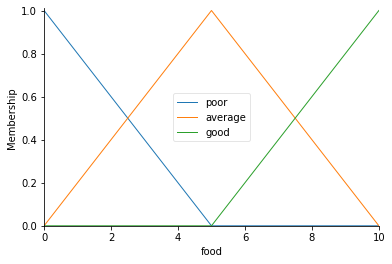

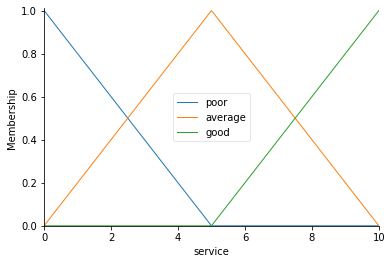

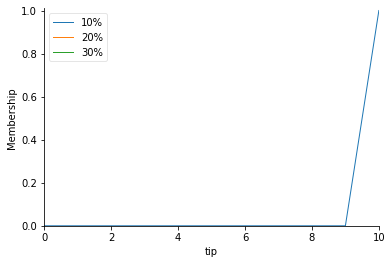

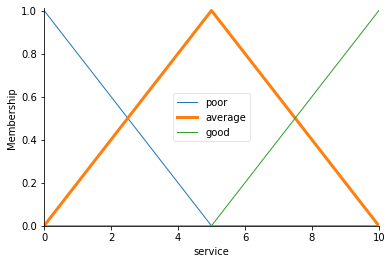

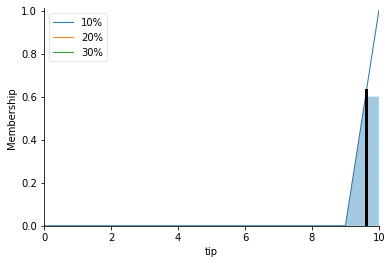

In [ ]:
food=  ctrl.Antecedent(np.arange(0,11,1),'food')#dùng để tạo một cái bảng và các thông số trong bảng 0:số đầu tiên, 11: giá trị của cột x, 1:step nhảy
service= ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(0,11,1),'tip')
#ve bieu do 
food['poor']= fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']= fuzz.trimf(food.universe,[5,10,10])

service['poor']= fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']= fuzz.trimf(service.universe,[5,10,10])

tip['10%']= fuzz.trimf(tip.universe,[10,10,10])
tip['20%']= fuzz.trimf(tip.universe,[10,20,30])
tip['30%']=fuzz.trimf(tip.universe,[30,30,30])

food.view()
service.view()
tip.view()

service['average'].view()
#đặc điều kiện 
rule1= ctrl.Rule(food['poor'] & service['poor'],tip['10%'])
rule2= ctrl.Rule(food['poor'] & service['average'],tip['10%'])
rule3= ctrl.Rule(food['average'] & service['average'],tip['10%'])
rule4= ctrl.Rule(food['good'] & service['average'],tip['20%'])
rule5= ctrl.Rule(food['poor'] & service['good'],tip['20%'])
rule6= ctrl.Rule(food['average'] & service['average'],tip['20%'])
rule7= ctrl.Rule(food['good'] & service['average'],tip['20%'])
rule8= ctrl.Rule(food['average'] & service['good'],tip['30%'])
rule9= ctrl.Rule(food['good'] & service['good'],tip['30%'])

#code cho no tinh toan.
tipping_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 2
tipping.input['service']=3
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)




88.85714285714288


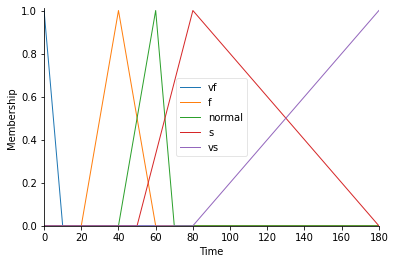

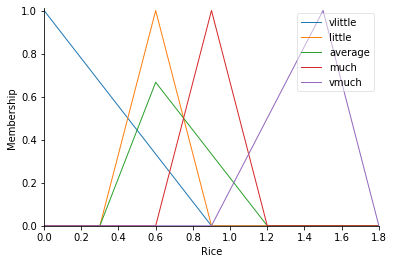

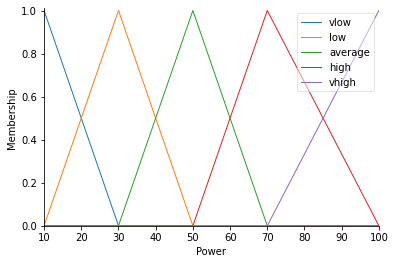

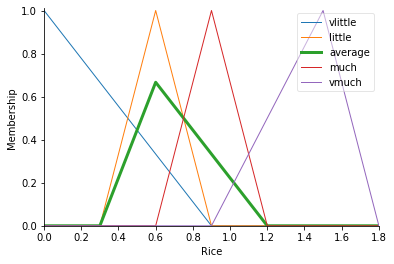

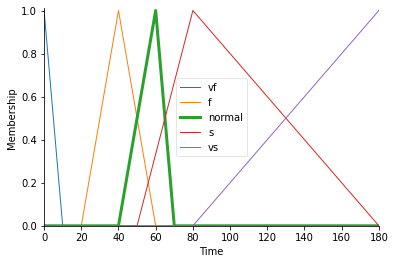

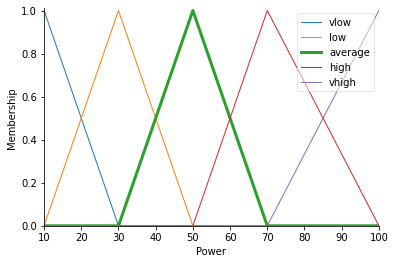

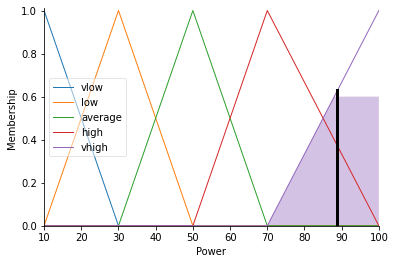

In [ ]:
time = ctrl.Antecedent(np.arange(0,181,1),'Time')
rice = ctrl.Antecedent(np.arange(0,2,0.3),'Rice')
power = ctrl.Consequent(np.arange(10,101,1),'Power')

time['vf']= fuzz.trimf(time.universe,[0,0,10])
time['f'] = fuzz.trimf(time.universe, [20,40,60])
time['normal']= fuzz.trimf(time.universe, [40,60,70])
time['s']= fuzz.trimf(time.universe, [50,80,180])
time['vs']= fuzz.trimf(time.universe, [80,180,180])

rice['vlittle']= fuzz.trimf(rice.universe,[0,0,0.9])
rice['little'] = fuzz.trimf(rice.universe, [0.3,0.6,0.9])
rice['average']= fuzz.trimf(rice.universe, [0.4,0.7,1])
rice['much']= fuzz.trimf(rice.universe, [0.7,0.9,1.2])
rice['vmuch']= fuzz.trimf(rice.universe,[0.9,1.5,1.5])

power['vlow'] = fuzz.trimf(power.universe, [10,10,30])
power['low'] = fuzz.trimf(power.universe,[10,30,50])
power['average'] = fuzz.trimf(power.universe,[30,50,70])
power['high'] = fuzz.trimf(power.universe,[50,70,100])
power['vhigh'] = fuzz.trimf(power.universe,[70,100,100])

time.view()
rice.view()
power.view()

rice['average'].view()
time['normal'].view()
power['average'].view()

rule1 = ctrl.Rule(time['vf'] & rice['vlittle'], power['vhigh'])
rule2 = ctrl.Rule(time['vf'] & rice['little'], power['vhigh'])
rule3 = ctrl.Rule(time['vf'] & rice['average'], power['vhigh'])
rule4 = ctrl.Rule(time['vf'] & rice['much'], power['vhigh'])
rule5 = ctrl.Rule(time['vf'] & rice['vmuch'], power['vhigh'])

rule6 = ctrl.Rule(time['f'] & rice['vlittle'], power['high'])
rule7 = ctrl.Rule(time['f'] & rice['little'], power['high'])
rule8 = ctrl.Rule(time['f'] & rice['average'], power['high'])
rule9 = ctrl.Rule(time['f'] & rice['much'], power['vhigh'])
rule10 = ctrl.Rule(time['f'] & rice['vmuch'],power['vhigh'])

rule11 = ctrl.Rule(time['normal'] & rice['vlittle'], power['vlow'])
rule12 = ctrl.Rule(time['normal'] & rice['little'], power['low'])
rule13 = ctrl.Rule(time['normal'] & rice['average'], power['average'])
rule14 = ctrl.Rule(time['normal'] & rice['much'], power['high'])
rule15 = ctrl.Rule(time['normal'] & rice['vmuch'], power['vhigh'])
                   
rule16 = ctrl.Rule(time['s'] & rice['vlittle'], power['low'])
rule17 = ctrl.Rule(time['s'] & rice['little'], power['low'])
rule18 = ctrl.Rule(time['s'] & rice['average'], power['vlow'])
rule19 = ctrl.Rule(time['s'] & rice['much'], power['vlow'])
rule20 = ctrl.Rule(time['s'] & rice['vmuch'], power['vlow'])

rule21 = ctrl.Rule(time['vs'] & rice['vlittle'], power['vlow'])
rule22 = ctrl.Rule(time['vs'] & rice['little'], power['vlow'])
rule23 = ctrl.Rule(time['vs'] & rice['average'], power['vlow'])
rule24 = ctrl.Rule(time['vs'] & rice['much'], power['vlow'])
rule25 = ctrl.Rule(time['vs'] & rice['vmuch'], power['vlow'])

cpower_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
cpower = ctrl.ControlSystemSimulation(cpower_ctrl)
cpower.input['Time'] = 4
cpower.input['Rice'] = 0.6
cpower.compute()
print(cpower.output['Power'])
power.view(sim = cpower)


